In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from scipy.stats import norm
from scipy.stats import binom

We have shown in previous analysis that the distribution of t-stats for a factor assuming that factor returns are normally distributed and factor exposures are uncorrelated is distributed N(beta_i * sqrt(n) / sigma_epsilon, 1 + n * (sigma_i * sigma_x_i / sigma_epsilon) ** 2) where n is the number of datapoints in cross-section; beta_i and sigma_i are the parameters of the factor return distribution for factor i; sigma_x_i is the standard deviation of the factor exposures of factor i; and sigma_epsilon is the stock-level volatility. 

In the case of a spurious factor, sigma_i and beta_i are both zero, thus this distribution simplifies to N(0, 1). As such, because the t-stat for each day is iid, we can directly calculate what the probability of observing different numbers of t-stat cutoffs under various t-stat cutoffs is by using the binomial distribution.

In [20]:
def tstat_distribution_params(beta_i, sigma_i, n, sigma_epsilon=1, sigma_x_i=1, period_length_days=1):
    
    #### Calculate the mean and standard deviation of the t-stat distribution
    # Default for sigma_epsilon to default to showing vols as a proportion of annualised
    # Default for sigma_x_i is 1 to allow for ease - this is essentially presuming that the factor is normalised
    
    loc = beta_i * (n ** 0.5) / sigma_epsilon * period_length_days / 252
    scale = (1 + n * (sigma_i * sigma_x_i / sigma_epsilon * period_length_days / 252) ** 2) ** 0.5
    
    return loc, scale

(0.0, 1.0)

In [17]:
def single_abs_tstat_probability(tstat, loc, scale):
    
    #### Calculate the absolute probability any single datapoint is above tstat 
    return norm.cdf(tstat, loc, scale) - norm.cdf(-tstat, loc, scale)

In [18]:
def tstat_proportion_probability(proportion, no_datapoints, tstat, loc, scale):
    
    #### Calculate the proportion of t-stats above a given t-stat cutoff
    tstat_prob = single_abs_tstat_probability(tstat, loc, scale)
    return binom.pmf(int(no_datapoints * proportion), no_datapoints, tstat_prob)

Text(0, 0.5, '% Chance of 1 False Positive')

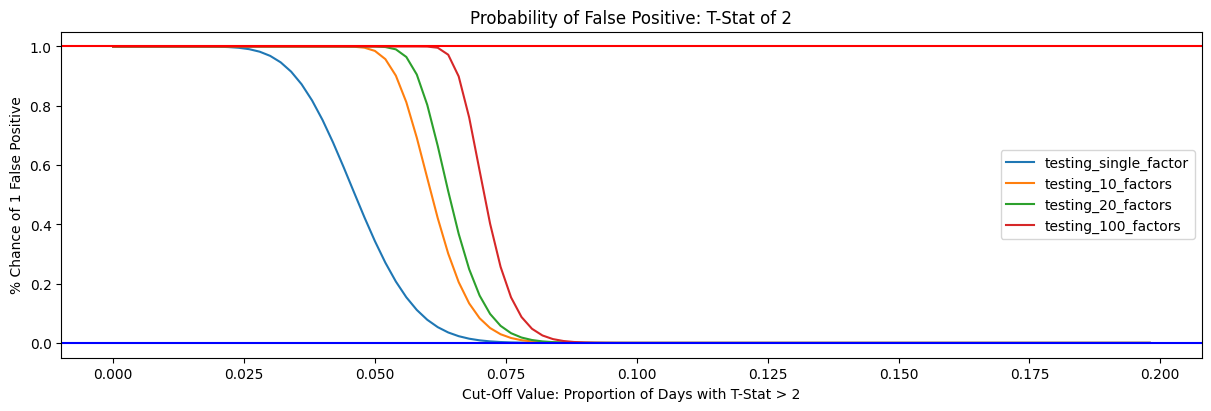

In [8]:
# Probability of false positive
single_test = {}
multiple_test_10 = {}
multiple_test_20 = {}
multiple_test_100 = {}
steps=500
no_datapoints = 500
prob = 0.9545

for i in range(int(steps*0.2)):
    single_test[i/steps] = binom.cdf(int(no_datapoints - i*no_datapoints/steps), no_datapoints, prob)
    multiple_test_10[i/steps] = 1 - binom.cdf(0, 10, single_test[i/steps])
    multiple_test_20[i/steps] = 1 - binom.cdf(0, 20, single_test[i/steps])
    multiple_test_100[i/steps] = 1 - binom.cdf(0, 100, single_test[i/steps])
fig, ax1 = plt.subplots(1,1, figsize=(12,4), constrained_layout=True)
results = pd.DataFrame({'testing_single_factor':single_test,
                        'testing_10_factors':multiple_test_10,
                        'testing_20_factors':multiple_test_20,
                        'testing_100_factors':multiple_test_100}).plot(title='Probability of False Positive: T-Stat of 2', ax=ax1)
# Set horizontal title for ax1
ax1.axhline(1, color='r')
ax1.axhline(0, color='b')
ax1.set_xlabel('Cut-Off Value: Proportion of Days with T-Stat > 2')
ax1.set_ylabel('% Chance of 1 False Positive')

In [16]:


calculate_abs_tstat_probability(2,0,1)

np.float64(0.9544997361036416)

In the case of a non-spurious factor, the ex-post distribution of t-stats will be distributed as N(beta_i * sqrt(n) / sigma_epsilon, 1 + n * (sigma_i * sigma_x_i / sigma_epsilon) ** 2) 

The chance 

In [ ]:
# Probability of false positive
single_test = {}
multiple_test_10 = {}
multiple_test_20 = {}
multiple_test_100 = {}
steps=500
no_datapoints = 500
prob = 0.9545



for i in range(int(steps*0.2)):
    single_test[i/steps] = binom.cdf(int(no_datapoints - i*no_datapoints/steps), no_datapoints, prob)
    multiple_test_10[i/steps] = 1 - binom.pmf(0, 10, single_test[i/steps])
    multiple_test_20[i/steps] = 1 - binom.cdf(0, 20, single_test[i/steps])
    multiple_test_100[i/steps] = 1 - binom.cdf(0, 100, single_test[i/steps])
fig, ax1 = plt.subplots(1,1, figsize=(12,4), constrained_layout=True)
results = pd.DataFrame({'testing_single_factor':single_test,
                        'testing_10_factors':multiple_test_10,
                        'testing_20_factors':multiple_test_20,
                        'testing_100_factors':multiple_test_100}).plot(title='Probability of False Positive: T-Stat of 2', ax=ax1)
# Set horizontal title for ax1
ax1.axhline(1, color='r')
ax1.axhline(0, color='b')
ax1.set_xlabel('Cut-Off Value: Proportion of Days with T-Stat > 2')
ax1.set_ylabel('% Chance of 1 False Positive')